In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("data/mroc/mroc_metars.csv", usecols=["Year", "Month", "Day", "Hour", "Cavok"])
data.head()

,Year,Month,Day,Hour,Cavok
0,2005,1,1,0,0.0
1,2005,1,1,1,0.0
2,2005,1,1,2,0.0
3,2005,1,1,3,0.0
4,2005,1,1,4,0.0


In [3]:
a = np.zeros(12)
means = np.zeros(12)
for i in range(len(a)):
    j = i + 1
    df = data.query(f"Month == {j}")
    means[i] = df["Pressure"].mean()
means

KeyError: 'Pressure'

Text(0, 0.5, 'Temperatura de rocío (°)')

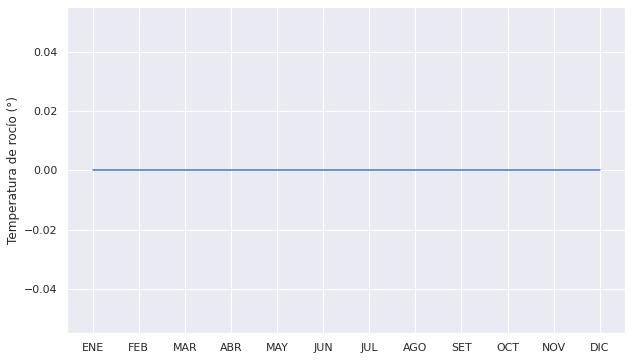

In [4]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
im = sns.lineplot(x=range(12), y=means, ax=ax)
im.set_xticks(list(range(12)))
im.set_xticklabels(["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SET", "OCT", "NOV", "DIC"])
im.set_ylabel("Temperatura de rocío (°)")

In [6]:
list(map(int, arr.tolist()))

[0, 29, 58, 88, 117, 147, 176, 206, 235, 265]

In [17]:
data["Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [26]:
years = data["Year"].unique()
months = np.arange(1, 13)
month_means = np.arange(12)
for m in months:
    m_sum = 0

    for y in years:
        m_df = data.query(f"Year == {y} and Month == {m}")

        for d in range(28):
            d_df = m_df.query(f"Day == {d}")
            day_sum = d_df["Cavok"].sum()

            if day_sum > 12:
                m_sum += 1
            
    month_means[m - 1] = m_sum / len(years)
frecs = 100 * month_means / 28
print(month_means, frecs)

[10 11 10  8  4  3  4  4  4  2  3  8] [35.71428571 39.28571429 35.71428571 28.57142857 14.28571429 10.71428571
 14.28571429 14.28571429 14.28571429  7.14285714 10.71428571 28.57142857]


[Text(0, 0, 'ENE'),
 Text(1, 0, 'FEB'),
 Text(2, 0, 'MAR'),
 Text(3, 0, 'ABR'),
 Text(4, 0, 'MAY'),
 Text(5, 0, 'JUN'),
 Text(6, 0, 'JUL'),
 Text(7, 0, 'AGO'),
 Text(8, 0, 'SET'),
 Text(9, 0, 'OCT'),
 Text(10, 0, 'NOV'),
 Text(11, 0, 'DIC')]

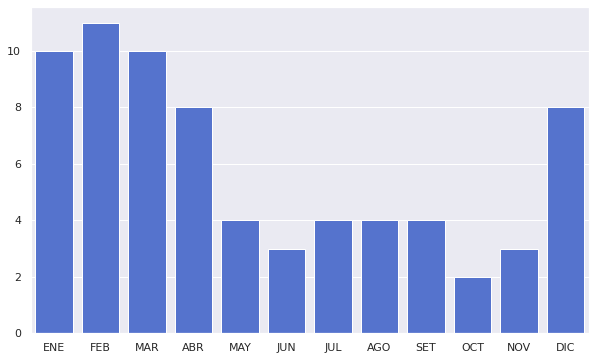

In [22]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
im = sns.barplot(x=months, y=month_means, color="royalblue")
im.set_xticklabels(["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SET", "OCT", "NOV", "DIC"])

In [44]:
arr = np.array([["SH", np.nan, "TS", "SH", np.nan, np.nan], ["SH", np.nan, "TS", "SH", np.nan, np.nan]])
arr = pd.DataFrame(arr)
ocurrences = np.count_nonzero(arr == "SH")
ocurrences

4

In [41]:
val = np.count_nonzero(data["Hour"] != 0)
val

134676

In [8]:
arr = np.array([np.nan, 1, 2, 3, 4, 5, np.nan, np.nan])
df = pd.DataFrame(arr, columns=["p"])
df.head(8)

,p
0,NaN
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,NaN
7,NaN


In [7]:
mean = df["p"].mean()
mean

3.0

In [1]:
X = [1,2,3,4,5,6,7,8,9]
for i, x in enumerate(X):
    print(f"{i}: {x}")

0: 1
1: 2
2: 3
3: 4
4: 5
5: 6
6: 7
7: 8
8: 9


In [5]:
a = np.zeros(4)

In [8]:
a[0] += 1
a

array([3., 0., 0., 0.])

In [10]:
b = a / 5
b

array([0.6, 0. , 0. , 0. ])

In [3]:
dz = np.array([14, 10, 10, 11, 13, 14, 16, 13,  9, 13, 15, 15,])
ra = np.array([8, 4, 5, 4, 4, 4, 8, 5, 3, 4, 8, 6,])
sh = np.array([2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2,])
ts = np.array([0, 0, 0, 1, 3, 3, 6, 4, 2, 2, 1, 0,])
months = [
    "Enero",
    "Febrero",
    "Marzo",
    "Abril",
    "Mayo",
    "Junio",
    "Julio",
    "Agosto",
    "Setiembre",
    "Octubre",
    "Noviembre",
    "Diciembre",
]
step = [m[:3].upper() for m in months]
means = []

for arr, kind in zip([dz, ra, sh, ts], ["DZ", "RA", "SHRA", "TS ó TSRA"]):
    for i in range(12):
        l = [step[i], arr[i], kind]
        means.append(l)

means

[['ENE', 14, 'DZ'],
 ['FEB', 10, 'DZ'],
 ['MAR', 10, 'DZ'],
 ['ABR', 11, 'DZ'],
 ['MAY', 13, 'DZ'],
 ['JUN', 14, 'DZ'],
 ['JUL', 16, 'DZ'],
 ['AGO', 13, 'DZ'],
 ['SET', 9, 'DZ'],
 ['OCT', 13, 'DZ'],
 ['NOV', 15, 'DZ'],
 ['DIC', 15, 'DZ'],
 ['ENE', 8, 'RA'],
 ['FEB', 4, 'RA'],
 ['MAR', 5, 'RA'],
 ['ABR', 4, 'RA'],
 ['MAY', 4, 'RA'],
 ['JUN', 4, 'RA'],
 ['JUL', 8, 'RA'],
 ['AGO', 5, 'RA'],
 ['SET', 3, 'RA'],
 ['OCT', 4, 'RA'],
 ['NOV', 8, 'RA'],
 ['DIC', 6, 'RA'],
 ['ENE', 2, 'SHRA'],
 ['FEB', 2, 'SHRA'],
 ['MAR', 1, 'SHRA'],
 ['ABR', 1, 'SHRA'],
 ['MAY', 2, 'SHRA'],
 ['JUN', 2, 'SHRA'],
 ['JUL', 2, 'SHRA'],
 ['AGO', 1, 'SHRA'],
 ['SET', 1, 'SHRA'],
 ['OCT', 1, 'SHRA'],
 ['NOV', 2, 'SHRA'],
 ['DIC', 2, 'SHRA'],
 ['ENE', 0, 'TS ó TSRA'],
 ['FEB', 0, 'TS ó TSRA'],
 ['MAR', 0, 'TS ó TSRA'],
 ['ABR', 1, 'TS ó TSRA'],
 ['MAY', 3, 'TS ó TSRA'],
 ['JUN', 3, 'TS ó TSRA'],
 ['JUL', 6, 'TS ó TSRA'],
 ['AGO', 4, 'TS ó TSRA'],
 ['SET', 2, 'TS ó TSRA'],
 ['OCT', 2, 'TS ó TSRA'],
 ['NOV', 1, 'TS ó TSR

In [4]:
df = pd.DataFrame(means, columns=["step", "mean", "Tipo de Precipitación"])
df.head(12)

,step,mean,Tipo de Precipitación
0,ENE,14,DZ
1,FEB,10,DZ
2,MAR,10,DZ
3,ABR,11,DZ
4,MAY,13,DZ
5,JUN,14,DZ
6,JUL,16,DZ
7,AGO,13,DZ
8,SET,9,DZ
9,OCT,13,DZ


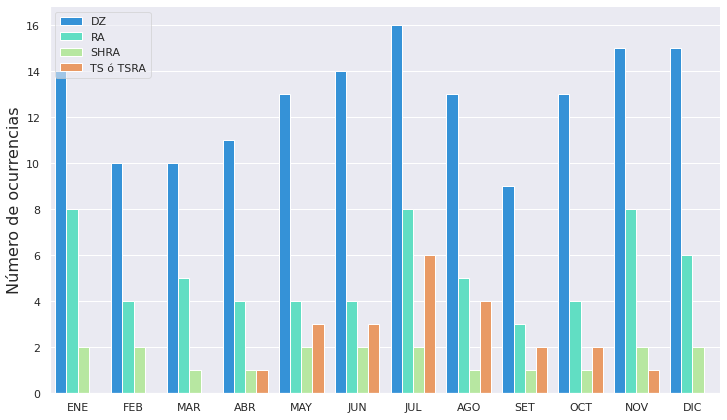

In [5]:
sns.set()
sns.set(rc={'figure.figsize':(20,15)})
#fig, ax = plt.subplots(figsize=(10, 6))
sns.catplot(x="step", y="mean", hue="Tipo de Precipitación", data=df, kind="bar", height=6, aspect=10/6, legend_out=False, palette="rainbow")
plt.xlabel("")
plt.ylabel("Número de ocurrencias", fontsize=16)
plt.legend(framealpha=0.6)
#fig.subplots_adjust(
#        bottom=0.05, top=0.95, left=0.1, right=0.95
#    )
plt.savefig("trash/all_weather_barplot.png", format="png", dpi=600, bbox_inches='tight')

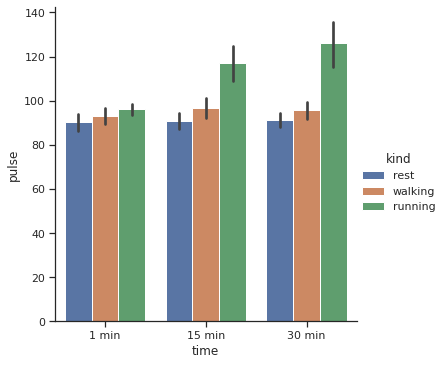

In [55]:
sns.set_theme(style="ticks")
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="bar")

In [49]:
exercise.head(20)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest
